## Tatiana Chavez Perez
## Harold Rojas Camacho
## Carlos Fernando Gonzalez Sarmiento

In [ ]:
import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statistics as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score, precision_score, mean_squared_error,mean_absolute_error,r2_score

# Punto 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
personas=pd.read_csv('/content/drive/MyDrive/UPersonas.csv',sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,415,423,424,431,432,440) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Punto 2

**SELECCIÓN DE VARIABLES:**
- 15 - Sexo: Porque se ha demostrado que hay diferencias de salarios entre las mujeres y los hombres, es decir el género de una persona si afecta la variable representativa.
- 128 - Numero de hijos: La cantidad de hijos nacidos vivos puede determinar el salario, ya que entre mayor número de hijos se necesitará más cantidad de dinero para sustentar sus necesidades.
- 12 - Edad: Entre mayor edad es más probable que la persona tenga experiencia.
- 23 - Estado civil: Ya que esta representa la situación de las personas físicas determinada por sus relaciones de familia, es decir si esta soltero,casado, viudo, separada o divorciado.
- 166 - Nivel educativo mayor alcanzado por: Ya que esto influye si ha tenido algun tipo de aprendizaje en el campo de la educacion superior o tecnologico, en posgrado, solo primaria, solo secundaria, preescolar o ninguno y por lo tanto segun lo anterior poseer un mayor conocimiento acerca de algún campo.
- 42 - ¿Cotiza en un fondo de pensiones?: Esta variable puede afectar de una manera tannto positiva como negativa, al tener un trabajo infromal cada quien tiene que velar por su pension, esta no esta pagada por una empresa sino por si mismo, por otro lado si esta en un trabajo formal, posiblemente esta pension ya se la empiece a pagar la empresa y como posiblemente ya tenga una parte pagada puede que reciba un mayor salario.
- 211 tipo_contrato: El tipo de contrato que posee cada persona tambien influye en su salario ya que si es un contrato verbal o no tenga ningun tipo de contrato puede que sea un trabajo con menor seriedad lo cual puede que no se hagan cargo con la EPS, de igual manera como se mencionaba, con la pensión, entre otros y puede que esté recibiendo menos de un salario minimo.

In [ ]:
personas[['nivel_educ']].value_counts()

nivel_educ
4.0           1138
6.0            371
3.0            332
10.0           220
9.0            135
8.0            134
5.0            103
12.0            96
7.0             52
1.0             48
11.0            17
2.0             11
dtype: int64

Se pude ver que la mayoria de personas encuestadas han llegado a estudios de secundaria o media

In [ ]:
salario = personas[['vr_salario']] #Variable respuesta
salario

,vr_salario
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
19293,NaN
19294,NaN
19295,NaN
19296,NaN


In [ ]:
salario.value_counts()

vr_salario
800000.0      163
700000.0      151
1000000.0     127
1200000.0     107
900000.0      103
             ... 
930000.0        1
915000.0        1
904000.0        1
901000.0        1
842000.0        1
Length: 326, dtype: int64

In [ ]:
variables=personas[['edad','sexo','estado_civil','cotizando','hijos_vivos','nivel_educ','tipo_contrato']] #Variables seleccionadas (Base general)
variables

,edad,sexo,estado_civil,cotizando,hijos_vivos,nivel_educ,tipo_contrato
0,60,2,3,2.0,NaN,5.0,4.0
1,40,2,2,NaN,NaN,NaN,NaN
2,67,1,2,NaN,NaN,NaN,NaN
3,22,1,5,NaN,NaN,NaN,NaN
4,53,2,4,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19293,49,1,1,2.0,NaN,NaN,NaN
19294,46,2,1,2.0,1.0,NaN,4.0
19295,29,2,5,NaN,1.0,NaN,NaN
19296,14,2,5,NaN,NaN,NaN,NaN


In [ ]:
salario.describe()

,vr_salario
count,2.692000e+03
mean,1.033013e+06
std,9.058483e+05
min,5.000000e+03
25%,6.000000e+05
50%,7.600000e+05
75%,1.200000e+06
max,1.100000e+07


# Punto 3
**Análisis exploratorio corto de la información**

In [ ]:
datos = personas[['edad','sexo','estado_civil','cotizando','hijos_vivos','nivel_educ','tipo_contrato','vr_salario']]  #Base de los datos (Variable explicativa y variables respuestas) 

In [ ]:
datos.head()

,edad,sexo,estado_civil,cotizando,hijos_vivos,nivel_educ,tipo_contrato,vr_salario
0,60,2,3,2.0,NaN,5.0,4.0,NaN
1,40,2,2,NaN,NaN,NaN,NaN,NaN
2,67,1,2,NaN,NaN,NaN,NaN,NaN
3,22,1,5,NaN,NaN,NaN,NaN,NaN
4,53,2,4,2.0,NaN,NaN,NaN,NaN


In [ ]:
datos.describe()

,edad,sexo,estado_civil,cotizando,hijos_vivos,nivel_educ,tipo_contrato,vr_salario
count,19298.000000,19298.000000,19298.000000,7355.000000,5415.000000,2657.000000,5278.000000,2.692000e+03
mean,31.736605,1.531920,3.471707,1.713392,1.347184,5.475725,3.106859,1.033013e+06
std,20.657975,0.498993,1.677951,0.452207,0.476119,2.566340,1.153036,9.058483e+05
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03
25%,14.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,6.000000e+05
50%,29.000000,2.000000,5.000000,2.000000,1.000000,4.000000,4.000000,7.600000e+05
75%,48.000000,2.000000,5.000000,2.000000,2.000000,6.000000,4.000000,1.200000e+06
max,96.000000,2.000000,5.000000,2.000000,2.000000,12.000000,5.000000,1.100000e+07


En promedio los encuestados tienen aproximadamente 32 años, aproximadamente cada encuestado en promedio tienen un hijo, y el salrio promedio de los encuestados es 1'033013 pesos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


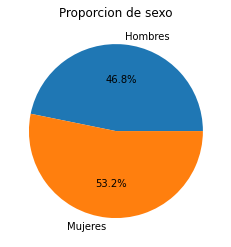

In [ ]:
x = datos[['sexo']]==1
z1= x.sum()/len(datos[['sexo']])


y= datos[['sexo']]==2
z2= y.sum()/len(datos[['sexo']])

plt.figure(figsize=(4,4))
labels = ["Hombres","Mujeres"]
z=[z1,z2]
plt.pie(z, labels=labels, autopct='%1.1f%%')
plt.title('Proporcion de sexo')
plt.show()


Mas de la mitad de los encuestados son de genero femenino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


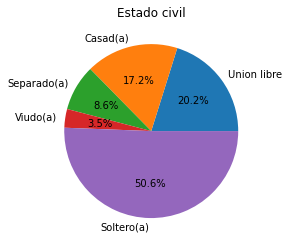

In [ ]:
x = datos[['estado_civil']]==1
z1= x.sum()/len(datos[['estado_civil']])


y= datos[['estado_civil']]==2
z2= y.sum()/len(datos[['estado_civil']])

x=datos[['estado_civil']]==3
z3= x.sum()/len(datos[['estado_civil']])

y= datos[['estado_civil']]==4
z4= y.sum()/len(datos[['estado_civil']])

y= datos[['estado_civil']]==5
z5= y.sum()/len(datos[['estado_civil']])

plt.figure(figsize=(4,4))
labels = ["Union libre","Casad(a)","Separado(a)","Viudo(a)","Soltero(a)"]
z=[z1,z2,z3,z4,z5]
plt.pie(z, labels=labels, autopct='%1.1f%%')
plt.title('Estado civil')
plt.show()

Mas de la mitad de los encuestados son solteros, el 20% de los encuestados estan en union libre, y 17% estan casados

In [ ]:
datos['tipo_contrato'].value_counts()

4.0    2808
2.0    1220
1.0     637
3.0     488
5.0     125
Name: tipo_contrato, dtype: int64

La mayoria de los encuestados no tienen contrato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


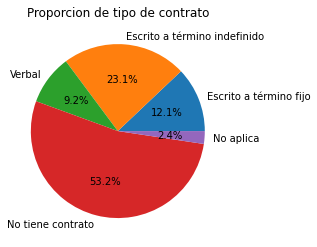

In [ ]:
x = datos[['tipo_contrato']]==1
z1= x.sum()/len(datos[['tipo_contrato']].dropna())


y= datos[['tipo_contrato']]==2
z2= y.sum()/len(datos[['tipo_contrato']].dropna())

x=datos[['tipo_contrato']]==3
z3= x.sum()/len(datos[['tipo_contrato']].dropna())

y= datos[['tipo_contrato']]==4
z4= y.sum()/len(datos[['tipo_contrato']].dropna())

y= datos[['tipo_contrato']]==5
z5= y.sum()/len(datos[['tipo_contrato']].dropna())

plt.figure(figsize=(4,4))
labels = ["Escrito a término fijo","Escrito a término indefinido","Verbal","No tiene contrato","No aplica"]
z=[z1,z2,z3,z4,z5]
plt.pie(z, labels=labels, autopct='%1.1f%%')
plt.title('Proporcion de tipo de contrato')
plt.show()

Especificamente el 53% de los encuestados no tienen un contrato, el 23% tiene un contrato escrito a termino indefinido y el 12% a termino fijo

In [ ]:
datos[['hijos_vivos']].value_counts()

hijos_vivos
1.0            3535
2.0            1880
dtype: int64

In [ ]:
datos[['hijos_vivos']].isna().sum()

hijos_vivos    13883
dtype: int64

In [ ]:
datos[['nivel_educ']].value_counts()

nivel_educ
4.0           1138
6.0            371
3.0            332
10.0           220
9.0            135
8.0            134
5.0            103
12.0            96
7.0             52
1.0             48
11.0            17
2.0             11
dtype: int64

La mayoria de los encuestados alcanzaron la basica secundaria y media, luego de ellos se presenta que se encontró que 371 individuos lacanzaron el tecnico con titulo, luego de ellos 332 solo completaron la basica primaria

(array([  59.,  332., 1138.,  103.,  371.,   52.,  134.,  135.,  220.,
         113.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

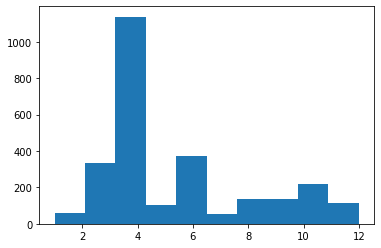

In [ ]:
plt.hist(datos['nivel_educ'])

En la grafica se puede observar que existe un mayor numero de individuos que alcanzaron el nivel educativo de basica secuandaria, los que menos se evidencian son tecnologico sin titulo y preescolar.

# Punto 4
**Preprocesamiento**

In [ ]:
datos = personas[['edad','sexo','estado_civil','cotizando','hijos_vivos','nivel_educ','tipo_contrato','vr_salario']]  
datos.shape

(19298, 8)

In [ ]:
datos.isna().sum()

edad                 0
sexo                 0
estado_civil         0
cotizando        11943
hijos_vivos      13883
nivel_educ       16641
tipo_contrato    14020
vr_salario       16606
dtype: int64

In [ ]:
datos.head()

,edad,sexo,estado_civil,cotizando,hijos_vivos,nivel_educ,tipo_contrato,vr_salario
0,60,2,3,2.0,NaN,5.0,4.0,NaN
1,40,2,2,NaN,NaN,NaN,NaN,NaN
2,67,1,2,NaN,NaN,NaN,NaN,NaN
3,22,1,5,NaN,NaN,NaN,NaN,NaN
4,53,2,4,2.0,NaN,NaN,NaN,NaN


In [ ]:
#TRANSFORMACIÓN DE VARIABLES DUMMY 
Sexo = pd.get_dummies(datos['sexo'],prefix = 'Sexo')
Estado_civil = pd.get_dummies(datos['estado_civil'],prefix = 'Estado civil')
Tipo_contrato = pd.get_dummies(datos['tipo_contrato'],prefix = 'Tipo de contrato')
Cotizando = pd.get_dummies(datos['cotizando'],prefix = 'Cotizando')
Educativo = pd.get_dummies(datos['nivel_educ'],prefix = 'Nivel educativo')

In [ ]:
datos = datos.drop(['sexo', 'estado_civil', 'tipo_contrato','cotizando','nivel_educ'],axis=1)
datos

,edad,hijos_vivos,vr_salario
0,60,NaN,NaN
1,40,NaN,NaN
2,67,NaN,NaN
3,22,NaN,NaN
4,53,NaN,NaN
...,...,...,...
19293,49,NaN,NaN
19294,46,1.0,NaN
19295,29,1.0,NaN
19296,14,NaN,NaN


In [ ]:
datos12 = pd.concat([datos,Sexo],axis = 1)
datos12


,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2
0,60,NaN,NaN,0,1
1,40,NaN,NaN,0,1
2,67,NaN,NaN,1,0
3,22,NaN,NaN,1,0
4,53,NaN,NaN,0,1
...,...,...,...,...,...
19293,49,NaN,NaN,1,0
19294,46,1.0,NaN,0,1
19295,29,1.0,NaN,0,1
19296,14,NaN,NaN,0,1


In [ ]:
datos13 = pd.concat([datos12,Estado_civil],axis = 1)
datos13

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5
0,60,NaN,NaN,0,1,0,0,1,0,0
1,40,NaN,NaN,0,1,0,1,0,0,0
2,67,NaN,NaN,1,0,0,1,0,0,0
3,22,NaN,NaN,1,0,0,0,0,0,1
4,53,NaN,NaN,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
19293,49,NaN,NaN,1,0,1,0,0,0,0
19294,46,1.0,NaN,0,1,1,0,0,0,0
19295,29,1.0,NaN,0,1,0,0,0,0,1
19296,14,NaN,NaN,0,1,0,0,0,0,1


In [ ]:
datos14 = pd.concat([datos13,Cotizando],axis = 1)
datos14

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_1.0,Cotizando_2.0
0,60,NaN,NaN,0,1,0,0,1,0,0,0,1
1,40,NaN,NaN,0,1,0,1,0,0,0,0,0
2,67,NaN,NaN,1,0,0,1,0,0,0,0,0
3,22,NaN,NaN,1,0,0,0,0,0,1,0,0
4,53,NaN,NaN,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19293,49,NaN,NaN,1,0,1,0,0,0,0,0,1
19294,46,1.0,NaN,0,1,1,0,0,0,0,0,1
19295,29,1.0,NaN,0,1,0,0,0,0,1,0,0
19296,14,NaN,NaN,0,1,0,0,0,0,1,0,0


In [ ]:
datos15 = pd.concat([datos14,Educativo],axis = 1)
datos15

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_1.0,Cotizando_2.0,Nivel educativo_1.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0
0,60,NaN,NaN,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,40,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,67,NaN,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53,NaN,NaN,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,49,NaN,NaN,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19294,46,1.0,NaN,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19295,29,1.0,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19296,14,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
datos2 = pd.concat([datos15,Tipo_contrato],axis = 1)
datos2

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_1.0,Cotizando_2.0,Nivel educativo_1.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_1.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
0,60,NaN,NaN,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,40,NaN,NaN,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,67,NaN,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53,NaN,NaN,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,49,NaN,NaN,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19294,46,1.0,NaN,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19295,29,1.0,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19296,14,NaN,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
datos2[['hijos_vivos']]=datos[['hijos_vivos']].fillna('0').astype('int')
datos2[['hijos_vivos']]

,hijos_vivos
0,0
1,0
2,0
3,0
4,0
...,...
19293,0
19294,1
19295,1
19296,0


In [ ]:
datos2.isna().sum()

edad                        0
hijos_vivos                 0
vr_salario              16606
Sexo_1                      0
Sexo_2                      0
Estado civil_1              0
Estado civil_2              0
Estado civil_3              0
Estado civil_4              0
Estado civil_5              0
Cotizando_1.0               0
Cotizando_2.0               0
Nivel educativo_1.0         0
Nivel educativo_2.0         0
Nivel educativo_3.0         0
Nivel educativo_4.0         0
Nivel educativo_5.0         0
Nivel educativo_6.0         0
Nivel educativo_7.0         0
Nivel educativo_8.0         0
Nivel educativo_9.0         0
Nivel educativo_10.0        0
Nivel educativo_11.0        0
Nivel educativo_12.0        0
Tipo de contrato_1.0        0
Tipo de contrato_2.0        0
Tipo de contrato_3.0        0
Tipo de contrato_4.0        0
Tipo de contrato_5.0        0
dtype: int64

In [ ]:
datos2_1 =  datos2[datos2['vr_salario'].notna()] #Se toman aquellas personas que si registraron un salario
datos2_1

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_1.0,Cotizando_2.0,Nivel educativo_1.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_1.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
7,30,1,1026000.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,31,0,750000.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17,32,0,689000.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18,37,0,1500000.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25,59,0,700000.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,1000000.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19265,54,0,690000.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19266,39,0,900000.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19274,27,1,679000.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
datos2_1.isna().sum()

edad                    0
hijos_vivos             0
vr_salario              0
Sexo_1                  0
Sexo_2                  0
Estado civil_1          0
Estado civil_2          0
Estado civil_3          0
Estado civil_4          0
Estado civil_5          0
Cotizando_1.0           0
Cotizando_2.0           0
Nivel educativo_1.0     0
Nivel educativo_2.0     0
Nivel educativo_3.0     0
Nivel educativo_4.0     0
Nivel educativo_5.0     0
Nivel educativo_6.0     0
Nivel educativo_7.0     0
Nivel educativo_8.0     0
Nivel educativo_9.0     0
Nivel educativo_10.0    0
Nivel educativo_11.0    0
Nivel educativo_12.0    0
Tipo de contrato_1.0    0
Tipo de contrato_2.0    0
Tipo de contrato_3.0    0
Tipo de contrato_4.0    0
Tipo de contrato_5.0    0
dtype: int64

In [ ]:
datos_final = datos2_1.dropna()
datos_final #Base de datos para final (Para la regresión)

,edad,hijos_vivos,vr_salario,Sexo_1,Sexo_2,Estado civil_1,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_1.0,Cotizando_2.0,Nivel educativo_1.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_1.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
7,30,1,1026000.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,31,0,750000.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17,32,0,689000.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18,37,0,1500000.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25,59,0,700000.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,1000000.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19265,54,0,690000.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19266,39,0,900000.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19274,27,1,679000.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
datos_final['vr_salario'] = pd.DataFrame(np.log(datos_final['vr_salario']))

In [ ]:
datos_final2=datos_final.drop(['Sexo_1','Estado civil_1','Cotizando_1.0','Nivel educativo_1.0','Tipo de contrato_1.0'],axis=1)

In [ ]:
datos_final2

,edad,hijos_vivos,vr_salario,Sexo_2,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_2.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
7,30,1,13.841178,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,31,0,13.527828,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
17,32,0,13.442997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18,37,0,14.220976,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25,59,0,13.458836,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,13.815511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19265,54,0,13.444447,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19266,39,0,13.710150,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19274,27,1,13.428376,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Punto 5

In [ ]:
n1=datos_final2.shape[0]*0.1
muestra10 = datos_final2.sample(n=int(n1),random_state=105) #Muestra del 10% de los datos
muestra10.sort_values

<bound method DataFrame.sort_values of        edad  hijos_vivos  ...  Tipo de contrato_4.0  Tipo de contrato_5.0
14862    46            1  ...                     0                     0
16935    51            0  ...                     0                     0
10744    37            1  ...                     0                     0
14069    56            0  ...                     0                     0
622      50            0  ...                     1                     0
...     ...          ...  ...                   ...                   ...
13909    37            1  ...                     0                     0
2521     38            0  ...                     0                     0
17957    53            0  ...                     0                     0
10292    56            0  ...                     0                     0
16591    55            0  ...                     0                     0

[269 rows x 24 columns]>

In [ ]:
muestra10.index

Int64Index([14862, 16935, 10744, 14069,   622,  9968,  9030,  1813,  3310,
             9710,
            ...
             6850,  8932,  9937, 13564,   617, 13909,  2521, 17957, 10292,
            16591],
           dtype='int64', length=269)

In [ ]:
muestra90 = datos_final2.drop(labels=muestra10.index)
muestra90 #Muestra del 90% restante de los datos 

,edad,hijos_vivos,vr_salario,Sexo_2,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_2.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
7,30,1,13.841178,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,31,0,13.527828,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
17,32,0,13.442997,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18,37,0,14.220976,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25,59,0,13.458836,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,13.815511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19265,54,0,13.444447,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19266,39,0,13.710150,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19274,27,1,13.428376,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = muestra90.drop(['vr_salario'], axis=1) #Muestra del 90% en cuanto a las variables explicativas
X

,edad,hijos_vivos,Sexo_2,Estado civil_2,Estado civil_3,Estado civil_4,Estado civil_5,Cotizando_2.0,Nivel educativo_2.0,Nivel educativo_3.0,Nivel educativo_4.0,Nivel educativo_5.0,Nivel educativo_6.0,Nivel educativo_7.0,Nivel educativo_8.0,Nivel educativo_9.0,Nivel educativo_10.0,Nivel educativo_11.0,Nivel educativo_12.0,Tipo de contrato_2.0,Tipo de contrato_3.0,Tipo de contrato_4.0,Tipo de contrato_5.0
7,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
17,32,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25,59,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19264,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19265,54,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19266,39,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19274,27,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = muestra90['vr_salario'] #Variables respuesta para la muestra del 90%
y

7        13.841178
9        13.527828
17       13.442997
18       14.220976
25       13.458836
           ...    
19264    13.815511
19265    13.444447
19266    13.710150
19274    13.428376
19279    13.443577
Name: vr_salario, Length: 2423, dtype: float64

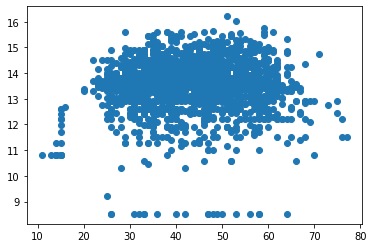

In [ ]:
plt.scatter(muestra90['edad'],muestra90['vr_salario'])

# Punto 6

In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state =45)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1817, 23), (606, 23), (1817,), (606,))

In [ ]:
reg = LinearRegression(fit_intercept=True)

In [ ]:
reg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_test = reg.predict(X_test)

In [ ]:
#sorted(datos_final['vr_salario])

In [ ]:
datos_final['vr_salario'].value_counts().sort_index()

8.517193     20
9.210340      1
10.308953     3
10.463103     1
10.596635     5
             ..
15.607270     8
15.623799     1
15.761421     1
16.012735     1
16.213406     1
Name: vr_salario, Length: 326, dtype: int64

In [ ]:
reg_train = LinearRegression(fit_intercept=True)

In [ ]:
reg_train.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y.value_counts()

13.592367    149
13.458836    139
13.815511    115
13.997832     97
13.710150     95
            ... 
13.441544      1
13.383188      1
14.909110      1
13.601079      1
13.463112      1
Name: vr_salario, Length: 300, dtype: int64

In [ ]:
y_test.count()

606

In [ ]:
len(reg.predict(X_test))

606

In [ ]:
y_pred_test=reg.predict(X_test)

# Punto 7

In [ ]:
y_true=datos_final[['vr_salario']]
def metricas(y_true, y_pred):
  print(f'El error cuadrático medio del modelo es: {mean_squared_error(y_true,y_pred)}')
  print(f'El Error absoluto medio del modelo es: {mean_absolute_error(y_true,y_pred)}')
  print(f'Raíz del error cuadrático medio del modelo es: {r2_score(y_true,y_pred)}')

In [ ]:
print('Métricas del entrenamiento',end='\n')
print('---'*10)
metricas(y_train, y_pred_train)
print('---'*10)
print('Métricas del testeo')
print('---'*10)
metricas(y_test, y_pred_test)

Métricas del entrenamiento
------------------------------
El error cuadrático medio del modelo es: 0.5643727025974675
El Error absoluto medio del modelo es: 0.5147199907873283
Raíz del error cuadrático medio del modelo es: 0.32459552310509465
------------------------------
Métricas del testeo
------------------------------
El error cuadrático medio del modelo es: 0.575117755983027
El Error absoluto medio del modelo es: 0.48631628423641315
Raíz del error cuadrático medio del modelo es: 0.32138254434898583


# Punto 8

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Regresión Lasso (L1)

In [ ]:
for i in np.arange(0,1,0.1):
  lasso10 = Lasso(alpha=i)
  lasso10.fit(X_train,y_train)
  model_l10 = lasso10.predict(X_train)
  ylasso_10 = lasso10.predict(X_test)
  print('Las metricas respectivamente son -------------Entrenamiento-----Testeo')
  print(f'El error cuadrático medio del modelo es: {mean_squared_error(y_train,model_l10), mean_squared_error(y_test,ylasso_10)}')
  print(f'El Error absoluto medio del modelo es: {mean_absolute_error(y_train,model_l10),mean_squared_error(y_test,ylasso_10)}')
  print(f'Raíz del error cuadrático medio del modelo es: {r2_score(y_train,model_l10),mean_squared_error(y_test,ylasso_10)}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484.5126994735849, tolerance: 0.15182979025162183
  positive)


Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.5333106213248049, 0.6046745144885896)
El Error absoluto medio del modelo es: (0.4949608443879545, 0.6046745144885896)
Raíz del error cuadrático medio del modelo es: (0.36176859801937367, 0.6046745144885896)
Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.6413006255003061, 0.6809064853794201)
El Error absoluto medio del modelo es: (0.5301722606860935, 0.6809064853794201)
Raíz del error cuadrático medio del modelo es: (0.2325331974687299, 0.6809064853794201)
Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.807289330661102, 0.8254716333317662)
El Error absoluto medio del modelo es: (0.5919967249479448, 0.8254716333317662)
Raíz del error cuadrático medio del modelo es: (0.03388873067645337, 0.8254716333317662)
Las metricas respectivamente son ---

Se puede ver como mientras mas se aumenta el alpha, mayor es el error cuadratico medio y el error absoluto, luego de algunos alphas, el modelo tiene la raiz del error cuadratico medio en 0 en el entrenamiento pero en el testeo es mucho mas alto, en el primer alpha se puede notar como aumenta las metricas del testeo y disminuye las del entrenamiento, cosa que no se quiere, por ello preferimos no aplicar un regresio Lasso

# Regresión Ridge (L2)

In [ ]:
for i in np.arange(0,100,10):
  ridge10 = Ridge(alpha=i)
  ridge10.fit(X_train,y_train)
  model_r10 = ridge10.predict(X_train)
  yridge_10 = ridge10.predict(X_test)
  print('Las metricas respectivamente son -------------Entrenamiento-----Testeo')
  print(f'El error cuadrático medio del modelo es: {mean_squared_error(y_train,model_r10),mean_squared_error(y_test,yridge_10)}')
  print(f'El Error absoluto medio del modelo es: {mean_absolute_error(y_train,model_r10),mean_squared_error(y_test,yridge_10)}')
  print(f'Raíz del error cuadrático medio del modelo es: {r2_score(y_train,model_r10),mean_squared_error(y_test,yridge_10)}')

Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.5333106213248049, 0.6046745144885896)
El Error absoluto medio del modelo es: (0.4949608443879545, 0.6046745144885896)
Raíz del error cuadrático medio del modelo es: (0.36176859801937367, 0.6046745144885896)
Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.5368679358909022, 0.6038209276511932)
El Error absoluto medio del modelo es: (0.49661268331354536, 0.6038209276511932)
Raíz del error cuadrático medio del modelo es: (0.35751143573528765, 0.6038209276511932)
Las metricas respectivamente son -------------Entrenamiento-----Testeo
El error cuadrático medio del modelo es: (0.5397208254857174, 0.6049724880512334)
El Error absoluto medio del modelo es: (0.4978121921683719, 0.6049724880512334)
Raíz del error cuadrático medio del modelo es: (0.35409728335768886, 0.6049724880512334)
Las metricas respectivamente son 

Nuevamente ocurrió lo mismo que con la regresión Lasso, desmejora las metricas de testeo, por ello preferimos dejarlas sin ajustar ningun otro tipo de modelo

In [ ]:
X10 = muestra10.drop(['vr_salario'], axis=1) #Muestra del 10% en cuanto de las variables explicativas
y10 = muestra10['vr_salario'] #Muestra del 10% en cuanto a la variable respuesta

In [ ]:
y_pred10 = reg.predict(X10)

In [ ]:
print('Métricas del 10%',end='\n')
print('---'*10)
metricas(y10, y_pred10)
print('---'*10)


Métricas del 10%
------------------------------
El error cuadrático medio del modelo es: 0.43510579551467965
El Error absoluto medio del modelo es: 0.44961874243618416
Raíz del error cuadrático medio del modelo es: 0.3777109955814274
------------------------------


# Punto 9

In [89]:
coeficientes= pd.DataFrame( {'variable': X_train.columns,'coeficientes': reg.coef_.flatten()})

In [90]:
reg.intercept_.round(4)

13.703

In [91]:
coeficientes.round(4)

,variable,coeficientes
0,edad,-0.0003
1,hijos_vivos,-0.2277
2,Sexo_2,-0.0204
3,Estado civil_2,0.0868
4,Estado civil_3,-0.1407
5,Estado civil_4,-0.0173
6,Estado civil_5,-0.2579
7,Cotizando_2.0,-0.3802
8,Nivel educativo_2.0,0.0000
9,Nivel educativo_3.0,-0.0922


$Y_{salario}$=13.703 - 0.0003$X_{edad}$ - 0.2277$X_{hijosvivos}$ - 0.0204$X_{sexo2}$ + 0.0868$X_{Est civ2}$ - 0.1407$X_{Est civ3}$ - 0.0173$X_{Est civ4}$ -0.2579$X_{Est civ5}$ - 0.3802$X_{no cotiza}$ - 0.0922$X_{Niv educativo 3}$ - 0.0687$X_{Niv educativo4}$ - 0.0089$X_{Niv educativo 5}$ + 0.2572$X_{Niv educativo 6}$ + 0.1301$X_{Niv educativo 7}$ + 0.4831$X_{Niv educativo 8}$ + 0.5114$X_{Niv educativo 9}$ + 0.6085$X_{Niv educativo 10}$ + 1.3476$X_{Niv educativo 11}$ + 0.7706$X_{Niv educativo 12}$ + 0.2632$X_{tipcontrato2}$ - 0.4085$X_{tipcontrato3}$ - 0.3221$X_{tipcontrato4}$

Se estima que cuando la edad de la persona aumente en 1 año la variable del salario disminuirá en 0.03% manteniendo las demas variables constantes, se estima que cuando la cantidad de hijos vivos aumente en una unidad, el salario disminuirá en 22.77% manteniendo las demas variables constantes, se estima que cuando la persona sea de sexo femenino el salario disminuirá en 2.04% en comparacion al sexo maculino, se estima que cuando la persona esta casada su salario va aumentar en un 8.68% en comparacion al estado civil union libre, se estima que cuando la persona esta separada o divorciada su salario va a disminuir en un 14.07% en comparacion al estado civil de union libre, se estima que cuando una persona es viuda su salario va a disminuir en 1.73% en comparacion a union libre, se estima que cuando la persona es soltera su salario va a disminuir en 25.79% en comparacion a el estado civil de union libre.

Se estima que cuando una persona no esta cotizando pension su salario va a disminuir en 38.02% en comparacion a que si este cotizando una pension, se estima que cuando el nivel educativo mas alto alcanzado por una persona es basica primaria su salario disminuirá en 9.22% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de basica secundaria y media su salario disminuirá en 6.87% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de tecnico sin titulo su salario diminuirá en 0.89% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de técnico con titulo su salario aumentará en 25.72% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de tecnológo con titulo su salario aumentará en 13.01% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de tecnológo con titulo su salario aumentrá en 48.31% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de universitario sin titulo su salario aumentará en 51.14% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de universitario sin titulo su salario va aumentar en 60.85% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de posgrado sin titulo su salario aumentará en 134.76% en comparacion a ningun nivel, se estima que cuando una persona posee un nivel educativo maximo de posgrado con titulo su salario aumentará en 77.06% en comparacion a ningun nivel educativo.

Finalmente, se estima que cuando una persona tiene un contrato escrito a termino indefinido su salario aumentará en 26.32% en comparación a un contrato escrito a termino fijo, se estima que cuando una persona tiene un contrato verbal, su salario disminuirá en 40.85% en comparación a un contrato escrito a termino fijo, se estima que cuando una persona no tiene un contrato su salario disminuirá en 32.21% en comparación a un contrato escrito a termino fijo.

# Bonus 

In [92]:
X10 = muestra10.drop(['vr_salario'], axis=1)
y10 = muestra10['vr_salario']
y_pred10 = reg.predict(X10)
print('Métricas del 10%',end='\n')
print('---'*10)
metricas(y10, y_pred10)
print('---'*10)

Métricas del 10%
------------------------------
El error cuadrático medio del modelo es: 0.43510579551467965
El Error absoluto medio del modelo es: 0.44961874243618416
Raíz del error cuadrático medio del modelo es: 0.3777109955814274
------------------------------
